# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Aditya Vahreza]
- **Email:** [vahreza48@gmail.com]
- **ID Dicoding:** [Adivah]

## Menentukan Pertanyaan Bisnis

- bagaimana kondisi cuaca (suhu, kelembaban, kecepatan angin) dan situasi cuaca (weathersit) memengaruhi jumlah penyewaan sepeda ?
- Jam berapa saja yang menunjukkan puncak penyewaan sepeda sepanjang hari?


## Import Semua Packages/Library yang Digunakan

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

**Insight:**
- xxx
- xxx

In [3]:
# Directory containing the CSV file
data_dir = "/content/drive/MyDrive/Latihan Machine leraning data/bike sharing dataset"

Day_df = pd.read_csv(data_dir + "/day.csv")
Hour_df = pd.read_csv(data_dir + "/hour.csv")

In [4]:
Day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
Hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [6]:
Day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
Day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
Day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
Hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
Hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
Hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

**Insight:**
- Menghapus kolom instant dan Workday. Untuk instant karena tidak terpakai dan untuk workday tidak diperlukan karena sudah ada weekday
- Disini kita akan menggunakan tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit' karena mereka semua memiliki data dengan beberapa varian
- kita akan menghandling tipe data dteday yang tadinya 'object' akan kita ubah menjadi 'datetime'
- Mengganti nama kolom agar lebih mudah dibaca
- Mengkonversi isi kolom agar mudah dipahami

Dropping

In [12]:
day_df = Day_df.drop(columns=['instant', 'workingday'])
hour_df = Hour_df.drop(columns=['instant', 'workingday'])

Mengubah Tipe Data

In [13]:
# Mengubah tipe data integer menjadi category\

columns_to_convert = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
day_df[columns_to_convert] = day_df[columns_to_convert].astype('category')
hour_df[columns_to_convert] = hour_df[columns_to_convert].astype('category')

# Mengubah tipe data object menjadi datetime

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

Mengubah Nama kolom (Rename)

In [14]:
# Mengganti nama pada dataset day_df agar mudah dibaca
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'hum': 'humidity',
    'cnt': 'count_cr'
}, inplace=True)

In [15]:
# Mengganti nama pada dataset hour_df agar mudah dibaca

hour_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'hum': 'humidity',
    'cnt': 'count_cr'
}, inplace=True)

In [16]:
# Mengkonversi data pada dataset agar mudah dibaca

# Konversi season menjadi 1.spring 2.summer 3.fall 4.winter
day_df['season']=day_df['season'].map({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
    })

hour_df['season']=hour_df['season'].map({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
    })

# Konversi month menjadi 1.jan 2.feb 3.mar 4.apr 5.may 6.jun 7.jul 8.ags 9.sep 10.oct 11.nov 12.des
day_df['month']=day_df['month'].map({
    1: 'jan',
    2: 'feb',
    3: 'mar',
    4: 'apr',
    5: 'may',
    6: 'jun',
    7: 'jul',
    8: 'ags',
    9: 'sep',
    10: 'oct',
    11: 'nov',
    12: 'des'
    })

hour_df['month']=hour_df['month'].map({
    1: 'jan',
    2: 'feb',
    3: 'mar',
    4: 'apr',
    5: 'may',
    6: 'jun',
    7: 'jul',
    8: 'ags',
    9: 'sep',
    10: 'oct',
    11: 'nov',
    12: 'des'
    })

# Konversi weekday menjadi 0.sun 1.mon 2.tue 3.wed 4.thr 5.fri 6.sat
day_df['weekday']=day_df['weekday'].map({
    0: 'sun',
    1: 'mon',
    2: 'tue',
    3: 'wed',
    4: 'thr',
    5: 'fri',
    6: 'sat'
    })

hour_df['weekday']=hour_df['weekday'].map({
    0: 'sun',
    1: 'mon',
    2: 'tue',
    3: 'wed',
    4: 'thr',
    5: 'fri',
    6: 'sat'
    })

# konversi weahter_condition menjadi 1.clear 2.misty 3.light_RainSnow 4.Heavy_RainSnow
day_df['weather_condition']=day_df['weather_condition'].map({
    1: 'clear',
    2: 'misty',
    3: 'light_RainSnow',
    4: 'Heavy_RainSnow'
    })

hour_df['weather_condition']=hour_df['weather_condition'].map({
    1: 'clear',
    2: 'misty',
    3: 'light_RainSnow',
    4: 'Heavy_RainSnow'
    })

# Konversi year menjadi 0.2011 1.2012
day_df['year']=day_df['year'].map({
    0: 2011,
    1: 2012
    })

hour_df['year']=hour_df['year'].map({
    0: 2011,
    1: 2012
    })

# Menghitung humdity
day_df['humidity'] = day_df['humidity'] * 100
hour_df['humidity'] = hour_df['humidity'] * 100



## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
hour_df.describe()

,date,year,hr,temp,atemp,humidity,windspeed,casual,registered,count_cr
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2012-01-02 04:08:34.552045568,2011.502561,11.546752,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,2011.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2011.000000,6.000000,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,2012.000000,12.000000,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,2012.000000,18.000000,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,2012.000000,23.000000,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000
std,NaN,0.500008,6.914405,0.192556,0.171850,19.292983,0.122340,49.305030,151.357286,181.387599


Berdasarkan parameter statistik di atas, rata-rata penyewaan sepeda dari pukul 00.00 sampai pukul 23.59 memliki rata-rata penyewaan pada pukul 11.54 dengan standar deviasi yang bagus yaitu 6.9.

In [38]:
hour_df.groupby('hr')['count_cr'].mean().sort_values(ascending=False)

,count_cr
hr,
17,461.452055
18,425.510989
8,359.011004
16,311.983562
19,311.523352
13,253.661180
12,253.315934
15,251.233196
14,240.949246


Berdasarkan pivot tabel diatas waktu  penyewaan paling banyak pada sekitar jam 17 atau jam 5 sore dan waktu penyewaan paling rendah pada jam 4 pagi

In [19]:
hour_df.groupby('weather_condition')['count_cr'].mean().sort_values(ascending=False)

<ipython-input-19-5c09acec24e6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('weather_condition')['count_cr'].mean().sort_values(ascending=False)


,count_cr
weather_condition,
clear,204.869272
misty,175.165493
light_RainSnow,111.579281
Heavy_RainSnow,74.333333


berdasarkan data perjam pada penyewaan sepeda, penyewaan sepeda terbanyak pada kondisi cuaca Cerah, Sedikit awan, Berawan sebagian lalu Berawan sebagian dan paling rendah pada saat kondisi cuaca hujan lebat, badai petir, kabut, salju dan berkabut

In [20]:
hour_df.groupby('season')['count_cr'].mean().sort_values(ascending=False)

<ipython-input-20-7e9c7ad82740>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('season')['count_cr'].mean().sort_values(ascending=False)


,count_cr
season,
fall,236.016237
summer,208.344069
winter,198.868856
spring,111.114569


berdasarkan data perjam penyewaan sepeda, penyewaan sepeda terbanyak pada musim gugur dan penyewaan terendah pada musim semi.

In [21]:
hour_df.groupby(['season', 'weather_condition'])['count_cr'].mean().sort_values(ascending=False)

<ipython-input-21-5c1a6effc0ff>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(['season', 'weather_condition'])['count_cr'].mean().sort_values(ascending=False)


season  weather_condition
fall    clear                244.494207
summer  clear                232.410983
fall    misty                224.848997
winter  clear                209.463779
        misty                201.483974
summer  misty                181.261364
fall    light_RainSnow       171.955390
spring  clear                122.055535
winter  light_RainSnow       116.453333
summer  light_RainSnow       115.179803
spring  misty                103.074689
        Heavy_RainSnow        74.333333
        light_RainSnow        58.650407
summer  Heavy_RainSnow              NaN
fall    Heavy_RainSnow              NaN
winter  Heavy_RainSnow              NaN
Name: count_cr, dtype: float64

berdasarkan data penyewaan sepeda perjam dan gabungan dari musim dan kondisi cuaca, penyewaan terbanyak ada pada musim gugur dan kondisi cuaca Cerah, Sedikit awan, Berawan sebagian lalu Berawan sebagian dan penyewaan terendah ada pada musim dingin dan kondisi cuaca Hujan Lebat, Badai Petir, Kabut, Salju, lalu Kabut

In [22]:
day_df.describe()

,date,year,temp,atemp,humidity,windspeed,casual,registered,count_cr
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2011.500684,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,2011.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2011.000000,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,2012.000000,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,2012.000000,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,2012.000000,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,0.500342,0.183051,0.162961,14.242910,0.077498,686.622488,1560.256377,1937.211452


In [23]:
day_df.groupby('weather_condition')['count_cr'].mean().sort_values(ascending=False)

<ipython-input-23-6880602a547b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('weather_condition')['count_cr'].mean().sort_values(ascending=False)


,count_cr
weather_condition,
clear,4876.786177
misty,4035.862348
light_RainSnow,1803.285714


Berdasarkan data perhari pada penyewaan sepeda, penyewaan sepeda terbanyak pada kondisi cuaca Cerah, Sedikit awan, Berawan sebagian lalu Berawan sebagian dan paling rendah pada saat kondisi cuaca hujan lebat, badai petir, kabut, salju dan berkabut

In [24]:
day_df.groupby('season')['count_cr'].mean().sort_values(ascending=False)

<ipython-input-24-dc1261933d54>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('season')['count_cr'].mean().sort_values(ascending=False)


,count_cr
season,
fall,5644.303191
summer,4992.331522
winter,4728.162921
spring,2604.132597


berdasarkan data perhari penyewaan sepeda, penyewaan sepeda terbanyak pada musim gugur dan penyewaan terendah pada musim semi.

In [25]:
day_df.groupby(['season', 'weather_condition'])['count_cr'].mean().sort_values(ascending=False)

<ipython-input-25-253a9b70ca56>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(['season', 'weather_condition'])['count_cr'].mean().sort_values(ascending=False)


season  weather_condition
fall    clear                5878.257353
summer  clear                5548.548673
fall    misty                5222.479167
winter  clear                5043.563107
        misty                4654.000000
summer  misty                4236.705882
spring  clear                2811.135135
fall    light_RainSnow       2751.750000
spring  misty                2357.166667
winter  light_RainSnow       1961.600000
summer  light_RainSnow       1169.000000
spring  light_RainSnow        934.750000
Name: count_cr, dtype: float64

berdasarkan data penyewaan sepeda perhari dan gabungan dari musim dan kondisi cuaca, penyewaan terbanyak ada pada musim gugur dan kondisi cuaca Cerah, Sedikit awan, Berawan sebagian lalu Berawan sebagian dan penyewaan terendah ada pada musim semi dan kondisi cuaca Hujan Lebat, Badai Petir, Kabut, Salju, lalu Kabut

## Visualization & Explanatory Analysis

### Pertanyaan 1: bagaimana kondisi cuaca (suhu, kelembaban, kecepatan angin) dan situasi cuaca (weathersit) memengaruhi jumlah penyewaan sepeda ?

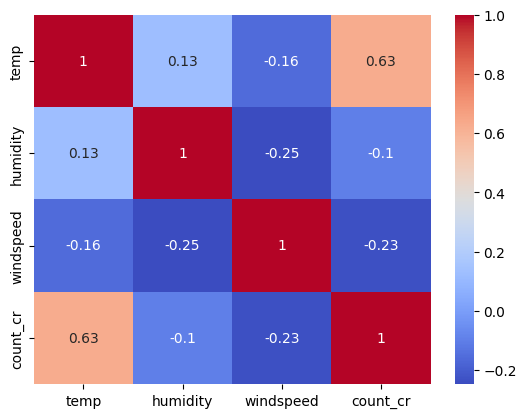

In [29]:
sns.heatmap(day_df[['temp', 'humidity', 'windspeed', 'count_cr']].corr(), annot=True, cmap='coolwarm')
plt.show()

Pada heat map  diatas hubungan antara penyewaan sepeda berdasarkan harian dengan kondisi suhu berpengaruh, jika keadaan suhu meningkat maka jumlah penyewa sepeda juga meningkat sedangkan hubungan antara kelembapan dan kecepatan angin memiliki hubungan yang lemah dengan jumlah penyewaaan sepeda jadi  tidak terlalu berpengaruh.

<ipython-input-33-9a1d27864318>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('weather_condition')['count_cr'].mean().plot(kind='bar', title="Rata-rata Penyewaan Berdasarkan Situasi Cuaca")


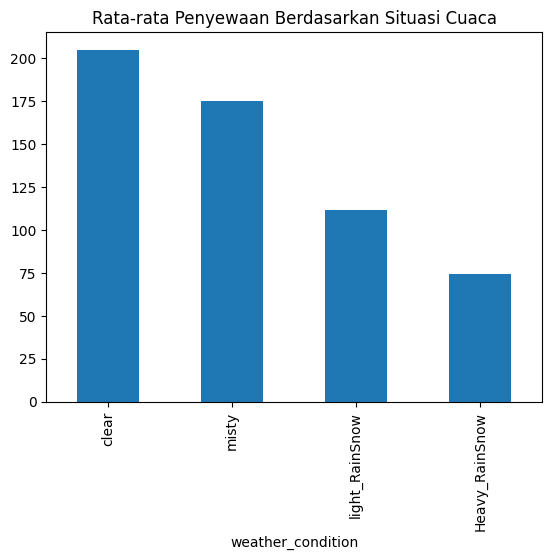

In [33]:
hour_df.groupby('weather_condition')['count_cr'].mean().plot(kind='bar', title="Rata-rata Penyewaan Berdasarkan Situasi Cuaca")
plt.show()


Berdasarkan bar chat ini situasi cuaca clear memiliki jumlah minat yang lebih banyak dalam penyewaan sepeda dibanding dengan situasi cuaca lainnya.

### Pertanyaan 2: Jam berapa saja yang menunjukkan puncak penyewaan sepeda sepanjang hari?

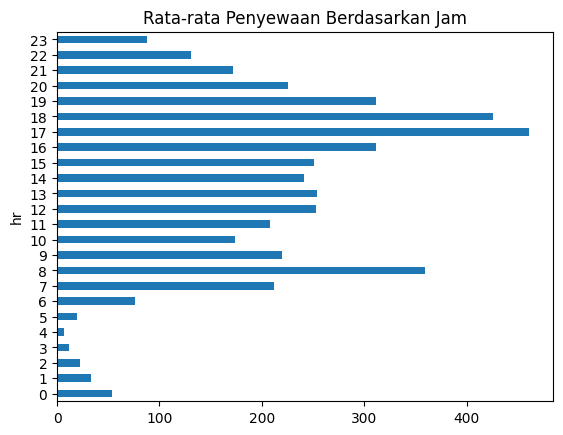

In [40]:
hour_df.groupby('hr')['count_cr'].mean().plot(kind='barh', title="Rata-rata Penyewaan Berdasarkan Jam")
plt.show()

Berdasarkan bar char dari data penyewa sepeda berdasarkan jam, Menunjukan bahwa puncak tertinggi penyewaan sepeda sepanjang hari ada pada pukul 17 atau pukul 5 sore.


## Conclusion

- Conclution pertanyaan 1 : bagaimana kondisi cuaca (suhu, kelembaban, kecepatan angin) dan situasi cuaca (weathersit) memengaruhi jumlah penyewaan sepeda ?
Jawab : Pada heat map diatas hubungan antara penyewaan sepeda berdasarkan harian dengan kondisi suhu berpengaruh, jika keadaan suhu meningkat maka jumlah penyewa sepeda juga meningkat sedangkan hubungan antara kelembapan dan kecepatan angin memiliki hubungan yang lemah dengan jumlah penyewaaan sepeda jadi tidak terlalu berpengaruh.
- Conclution pertanyaan 2 : Jam berapa saja yang menunjukkan puncak penyewaan sepeda sepanjang hari?
Jawab : Berdasarkan bar char dari data penyewa sepeda berdasarkan jam, Menunjukan bahwa puncak tertinggi penyewaan sepeda sepanjang hari ada pada pukul 17 atau pukul 5 sore.

## Analisis Lanjutan (Opsional)